In [3]:
'''
The goal of this doc is to calculate the LED power need for SWIR signal detection

'''

'\n\nf\n'

In [5]:
import matplotlib.pyplot as plt
import numpy as np

testing bandwidth
 22.75 MHz

testing power_snr_1

testing voltage_out


Text(0, 0.5, 'Voltage in mV')

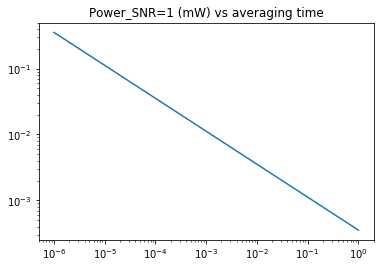

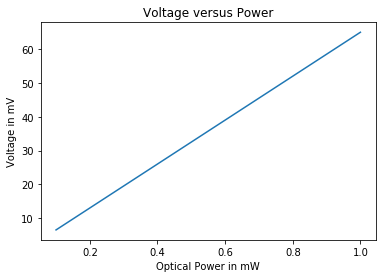

In [55]:
def voltage_out(power, r_load = 50, responsivity = 1.3):
    '''
    Calculates the output voltage for a given incident power.
    
    inputs:
        power: optical power into LED (watts)
        r_load: load resistance (ohms)
        responsivity: Current_out per power_in (A/W)
    
    outputs:
        voltage_out: voltage reading (V)
    '''
    voltage_out = power * r_load * responsivity
    return voltage_out
    
def bandwidth(r_load = 50, capacitance = 140):
    '''
    Calculates the signal bandwidth 
    
    inputs:
        r_load: load resistance (ohms)
        capacitance: diode capacitance (pF)
        
    outputs: 
        bandwidth: in hertz
    '''
    pi = 3.14
    bandwidth = 1 / (2*pi*r_load*capacitance *1e-12)
    return bandwidth

def power_snr_1(average_time, nep=5e-13):
    '''
    Calculates the power at a signal to noise ratio of 1 
    
    inputs:
        average_time: averaging time
        nep: noise equivalent power in W/sqrt(Hz)
        
    outputs: 
        power: power at a signal to noise ratio of 1
    '''
    
    bandwidth = 1 /(2*average_time) # nyquist criteria
    power_snr_1 = nep*np.sqrt(bandwidth)
    return power_snr_1


# test bandwidth
print("testing bandwidth")
print('{:6.2f} MHz\n'.format(bandwidth()/1e6))

    
    
# test power_snr_1
print("testing power_snr_1")
nep = 5e-13
average_time = np.logspace(-6, 0, 10)
power_snr = power_snr_1(average_time, nep)
f1, ax1 = plt.subplots()
ax1.loglog(average_time, power_snr*1e9)
ax1.set_title('Power_SNR=1 (mW) vs averaging time')


    
# test voltage_out
print("\ntesting voltage_out")
f, ax = plt.subplots()
power = np.linspace(1e-4, 1e-3, 10)
voltage = voltage_out(power)
ax.plot(power*1e3, voltage*1e3)
ax.set_title('Voltage versus Power')
ax.set_xlabel('Optical Power in mW')
ax.set_ylabel('Voltage in mV')



    


In [57]:
detector_area = 1 # cm2
distance = 1 #cm to the detector
reflectivity = 0.5
measured_area = 1 #cm2
dark_current = .001 #mA

led_power = 1 #mW
average_time = 0.1

incident_intensity = led_power / measured_area # ideal illumination. all LED's on leave
reflected_intensity = reflectivity*incident_intensity
detector_power = reflected_intensity * detector_area* detector_area/(2*np.pi*distance**2)

current = detector_power/1.3
dark_current_percentage = dark_current/current*100
power_snr = power_snr_1(average_time)



print('Power at diode is {:3.2f} mW'.format(detector_power))
print('Current at diode is {:3.2f} mA'.format(current))
print('Dark Current is {:3.2f}% of current'.format(dark_current_percentage))
print('Signal to noise ratio is {:3.2f}'.format(detector_power/power_snr))

Power at diode is 0.08 mW
Current at diode is 0.06 mA
Dark Current is 1.63% of current
Signal to noise ration is 71176254341.72


6.283185307179586